### 1.1. Attributes Information

The dataset contains missing values in its *stalk-root* attribute. To more accurate result we need to handle these missing values.
All attributes is of categorical variables. Some are binary, some are multiple.

#### classes: edible=e, poisonous=p

* 1 cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* 2 cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* 3 cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
* 4 bruises?: bruises=t,no=f
* 5 odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
* 6 gill-attachment: attached=a,descending=d,free=f,notched=n
* 7 gill-spacing: close=c,crowded=w,distant=d
* 8 gill-size: broad=b,narrow=n
* 9 gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
* 10 stalk-shape: enlarging=e,tapering=t
* 11 stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
* 12 stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* 13 stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* 14 stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
* 15 stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
* 16 veil-type: partial=p,universal=u
* 17 veil-color: brown=n,orange=o,white=w,yellow=y
* 18 ring-number: none=n,one=o,two=t
* 19 ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
* 20 spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
* 21 population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
* 22 habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### 1.2 Requirments

In this dataset, all features is in categroical format. So, we will do one-hot encoding.

* Fistly, we will impute the missing values by using KNN classifier.
* Secondly, we will train the Logistic Regression and Random Forest on clean data and check the different performance metrics.
* Finally, we will reduced the features by using PCA and then compare the complexity and scores with all features.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings('ignore')

## Data Understanding & Exploration

In [2]:
def explore_dataset(data, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("="*100)
    print("\nAny Missing Values Features (denoted by ?)\n")
    
    missing_values_features = df[df=='?'].any().reset_index()
    missing_values_features = missing_values_features[missing_values_features[0]==True]['index'].values[0]
    print("feature name: ",missing_values_features)
    
    print("\nTotal Missing Values (denoted by ?): {}".format(data[data[missing_values_features]=='?'][missing_values_features].shape[0]))
    print("="*100)
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("="*100)
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)
    print(" ")
    print("="*100)
    print("\tOverall Class Distribution")
    plt.figure(figsize=(7,6))
    data['class'].map({'e':'edible','p':'poisonous'}).value_counts().plot(kind='pie',autopct='%1.1f%%',
                                       startangle=90, shadow=False,fontsize=14).legend()
    plt.show()

In [3]:
columns = [
    'class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
    'gill-spacing','gill-size','gill-color','stalk-shap','stalk-root','stalk-surface-above-ring',
    'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color',
    'ring-number','ring-type','spore-print-color','population','habitat'
]
dataset_file = "mushrooms.txt"
df = pd.read_csv(dataset_file, names = columns)

			EDA Dataset: mushrooms.txt
Total Rows: 8124

Total Columns: 23

Columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shap', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Any Missing Values Features (denoted by ?)

feature name:  stalk-root

Total Missing Values (denoted by ?): 2480
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color           

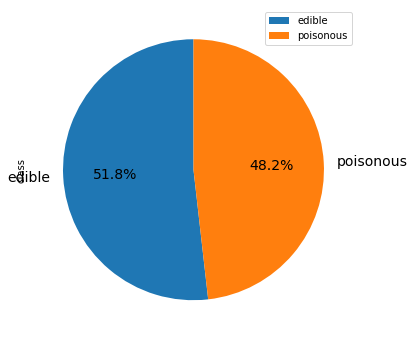

In [4]:
# lets check the information of mashroom dataset
explore_dataset(df,dataset_file)

## Data Cleaning & Analysis

In [5]:
def check_categorical_numeric_binary_multiclass_columns(data):
    """
    In check_categorical_numeric_binary_multiclass_columns function we are doing all the things that given below:
    - checking the categorical features except binary multiclass label
    - checking numeric columns
    - checking binary multiclass columns that value counts exist between (2 to 10) 
    """
    cat_cols_without_binary_multiclass = []
    num_cols = []
    binary_multiclass_cols = []

    for i in data.columns:
        if data[i].dtypes =='object' and (not(data[i].nunique() >=2 and data[i].nunique()<=10)):
            cat_cols_without_binary_multiclass.append(i)        
        else:
            if data[i].nunique() >=2 and data[i].nunique()<=10:
                binary_multiclass_cols.append(i)
            else:
                num_cols.append(i) 

    print("Length of without binary multiclass catagorical columns: ",len(cat_cols_without_binary_multiclass))
    print(cat_cols_without_binary_multiclass)
    print(" ")
    print("Length of binary multiclass columns: ",len(binary_multiclass_cols))  
    print(binary_multiclass_cols)
    print(" ")
    
    print("Length of numeric columns: ",len(num_cols))    
    print(num_cols)
    print(" ")
    
    return cat_cols_without_binary_multiclass,binary_multiclass_cols,num_cols


Length of without binary multiclass catagorical columns:  2
['gill-color', 'veil-type']
 
Length of binary multiclass columns:  21
['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shap', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
 
Length of numeric columns:  0
[]
 
+-----------------------+------------------+
|                       |   DataTypesCount |
|-----------------------+------------------|
| categorical_features  |                2 |
| numerical_features    |                0 |
| binary/mutli_features |               21 |
+-----------------------+------------------+


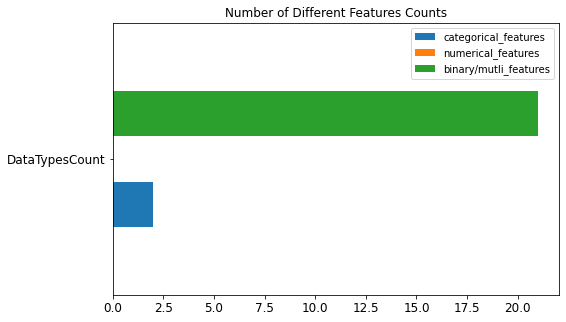

In [6]:
# lets get the categroical, binary_multiclass and numeric columns
cat_cols, binary_multiclass_cols, numeric_cols = check_categorical_numeric_binary_multiclass_columns(df)
categories_list = []
categories_list.append(len(cat_cols))
categories_list.append(len(numeric_cols))
categories_list.append(len(binary_multiclass_cols))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary/mutli_features"], 
                             columns=['DataTypesCount'])
print(tabulate(categories_df, headers = 'keys', tablefmt = 'psql'))

categories_df = categories_df.transpose().plot(kind="barh", figsize=(8, 5), title="Number of Different Features Counts", fontsize=12)

In [7]:
def categroy_distribution(data, col, top=None):
    print("\t\t{} Distribution".format(col))
    print()
    perc = round(data[col].value_counts(normalize=True)[:top]*100,2)

    dataCat = perc.to_frame().reset_index().rename(columns={'index':'Category',
                                                          col:f'{col}_Percentage'})
    print(tabulate(dataCat, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(7,7))
    fig = sns.countplot(x=col, data=data, color="g", order=data[col].value_counts().iloc[:top].index)
    for p in fig.patches:
        fig.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+10), size=15)
    plt.xticks(rotation=90)
    plt.show()

		class Distribution

+----+------------+--------------------+
|    | Category   |   class_Percentage |
|----+------------+--------------------|
|  0 | e          |               51.8 |
|  1 | p          |               48.2 |
+----+------------+--------------------+


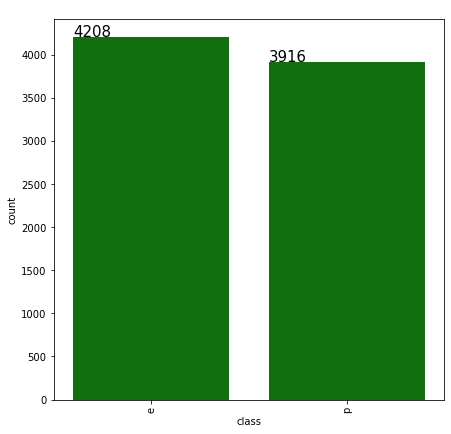

		cap-shape Distribution

+----+------------+------------------------+
|    | Category   |   cap-shape_Percentage |
|----+------------+------------------------|
|  0 | x          |                  45    |
|  1 | f          |                  38.8  |
|  2 | k          |                  10.19 |
|  3 | b          |                   5.56 |
|  4 | s          |                   0.39 |
|  5 | c          |                   0.05 |
+----+------------+------------------------+


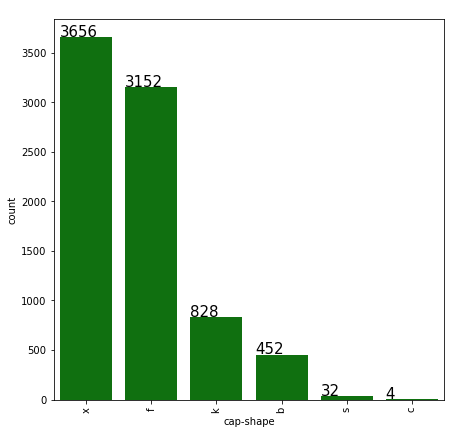

		cap-surface Distribution

+----+------------+--------------------------+
|    | Category   |   cap-surface_Percentage |
|----+------------+--------------------------|
|  0 | y          |                    39.93 |
|  1 | s          |                    31.46 |
|  2 | f          |                    28.56 |
|  3 | g          |                     0.05 |
+----+------------+--------------------------+


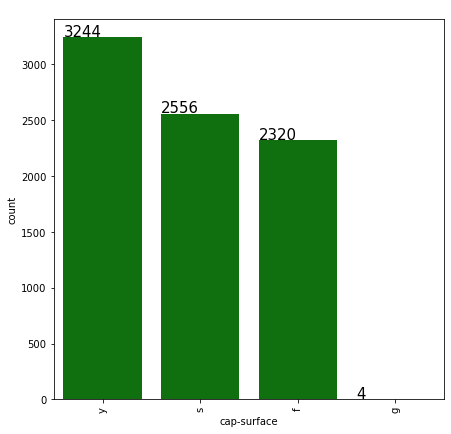

		cap-color Distribution

+----+------------+------------------------+
|    | Category   |   cap-color_Percentage |
|----+------------+------------------------|
|  0 | n          |                  28.11 |
|  1 | g          |                  22.65 |
|  2 | e          |                  18.46 |
|  3 | y          |                  13.2  |
|  4 | w          |                  12.8  |
|  5 | b          |                   2.07 |
|  6 | p          |                   1.77 |
|  7 | c          |                   0.54 |
|  8 | u          |                   0.2  |
|  9 | r          |                   0.2  |
+----+------------+------------------------+


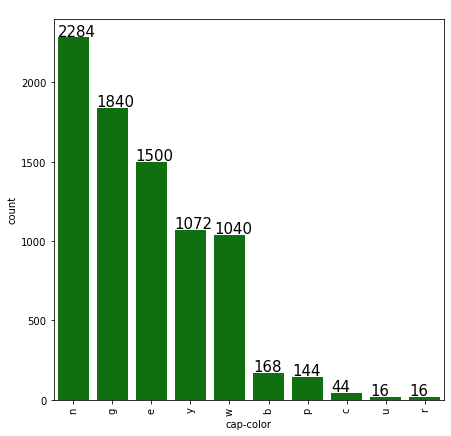

		bruises Distribution

+----+------------+----------------------+
|    | Category   |   bruises_Percentage |
|----+------------+----------------------|
|  0 | f          |                58.44 |
|  1 | t          |                41.56 |
+----+------------+----------------------+


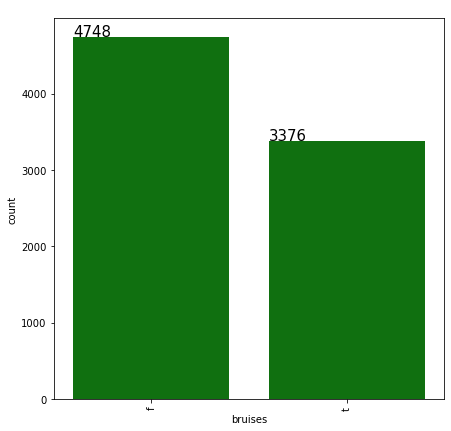

		odor Distribution

+----+------------+-------------------+
|    | Category   |   odor_Percentage |
|----+------------+-------------------|
|  0 | n          |             43.43 |
|  1 | f          |             26.59 |
|  2 | y          |              7.09 |
|  3 | s          |              7.09 |
|  4 | a          |              4.92 |
|  5 | l          |              4.92 |
|  6 | p          |              3.15 |
|  7 | c          |              2.36 |
|  8 | m          |              0.44 |
+----+------------+-------------------+


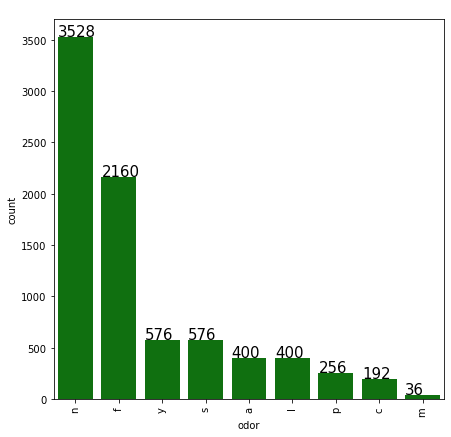

		gill-attachment Distribution

+----+------------+------------------------------+
|    | Category   |   gill-attachment_Percentage |
|----+------------+------------------------------|
|  0 | f          |                        97.42 |
|  1 | a          |                         2.58 |
+----+------------+------------------------------+


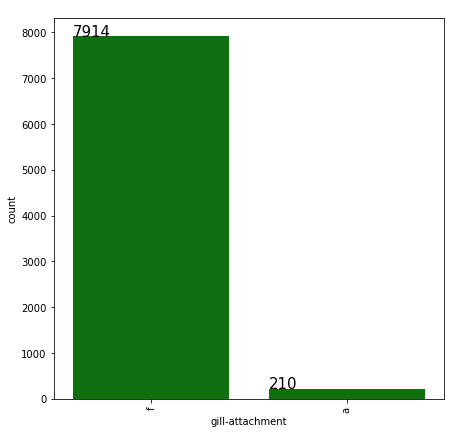

		gill-spacing Distribution

+----+------------+---------------------------+
|    | Category   |   gill-spacing_Percentage |
|----+------------+---------------------------|
|  0 | c          |                     83.85 |
|  1 | w          |                     16.15 |
+----+------------+---------------------------+


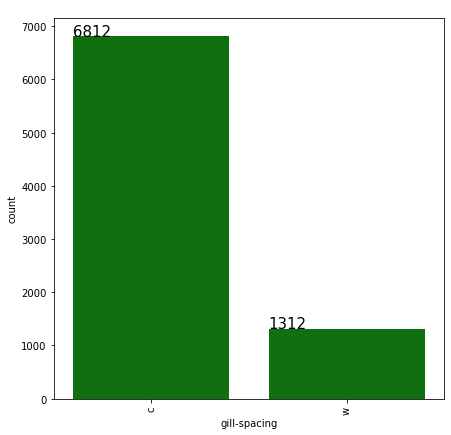

		gill-size Distribution

+----+------------+------------------------+
|    | Category   |   gill-size_Percentage |
|----+------------+------------------------|
|  0 | b          |                  69.08 |
|  1 | n          |                  30.92 |
+----+------------+------------------------+


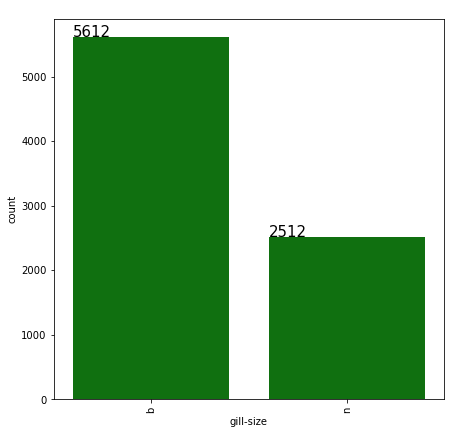

		gill-color Distribution

+----+------------+-------------------------+
|    | Category   |   gill-color_Percentage |
|----+------------+-------------------------|
|  0 | b          |                   21.27 |
|  1 | p          |                   18.37 |
|  2 | w          |                   14.8  |
|  3 | n          |                   12.9  |
|  4 | g          |                    9.26 |
|  5 | h          |                    9.01 |
|  6 | u          |                    6.06 |
|  7 | k          |                    5.02 |
|  8 | e          |                    1.18 |
|  9 | y          |                    1.06 |
| 10 | o          |                    0.79 |
| 11 | r          |                    0.3  |
+----+------------+-------------------------+


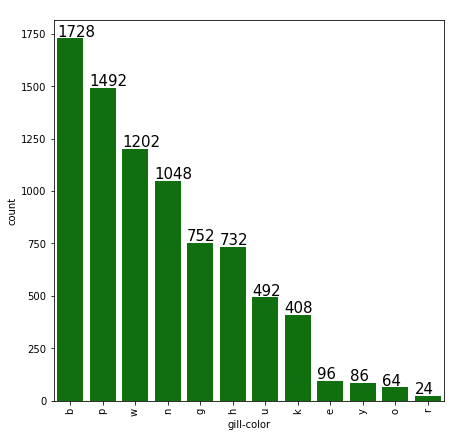

		stalk-shap Distribution

+----+------------+-------------------------+
|    | Category   |   stalk-shap_Percentage |
|----+------------+-------------------------|
|  0 | t          |                   56.72 |
|  1 | e          |                   43.28 |
+----+------------+-------------------------+


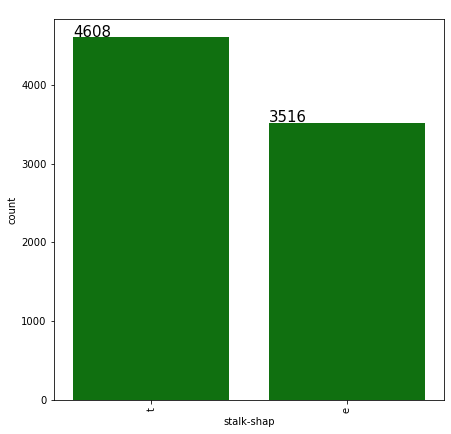

		stalk-root Distribution

+----+------------+-------------------------+
|    | Category   |   stalk-root_Percentage |
|----+------------+-------------------------|
|  0 | b          |                   46.48 |
|  1 | ?          |                   30.53 |
|  2 | e          |                   13.79 |
|  3 | c          |                    6.84 |
|  4 | r          |                    2.36 |
+----+------------+-------------------------+


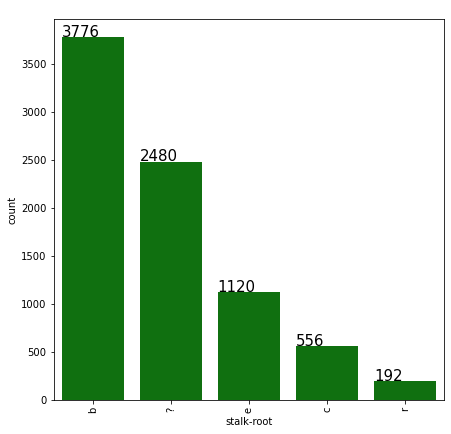

		stalk-surface-above-ring Distribution

+----+------------+---------------------------------------+
|    | Category   |   stalk-surface-above-ring_Percentage |
|----+------------+---------------------------------------|
|  0 | s          |                                 63.71 |
|  1 | k          |                                 29.2  |
|  2 | f          |                                  6.79 |
|  3 | y          |                                  0.3  |
+----+------------+---------------------------------------+


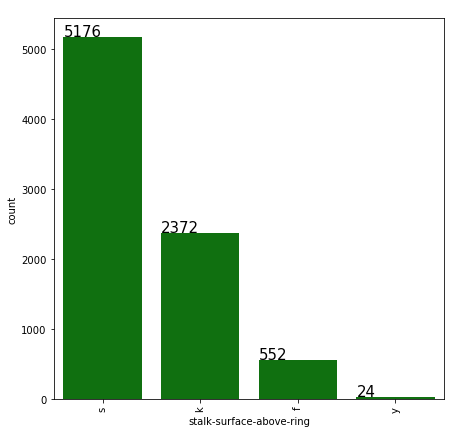

		stalk-surface-below-ring Distribution

+----+------------+---------------------------------------+
|    | Category   |   stalk-surface-below-ring_Percentage |
|----+------------+---------------------------------------|
|  0 | s          |                                 60.76 |
|  1 | k          |                                 28.36 |
|  2 | f          |                                  7.39 |
|  3 | y          |                                  3.5  |
+----+------------+---------------------------------------+


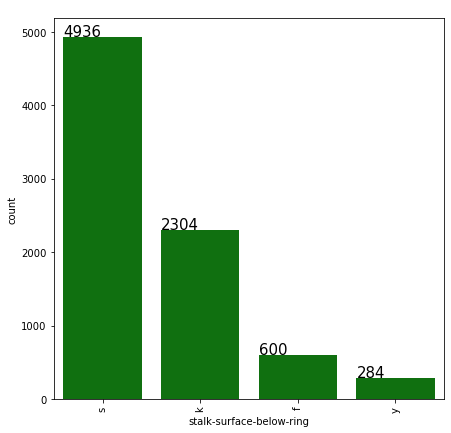

		stalk-color-above-ring Distribution

+----+------------+-------------------------------------+
|    | Category   |   stalk-color-above-ring_Percentage |
|----+------------+-------------------------------------|
|  0 | w          |                               54.95 |
|  1 | p          |                               23.04 |
|  2 | g          |                                7.09 |
|  3 | n          |                                5.51 |
|  4 | b          |                                5.32 |
|  5 | o          |                                2.36 |
|  6 | e          |                                1.18 |
|  7 | c          |                                0.44 |
|  8 | y          |                                0.1  |
+----+------------+-------------------------------------+


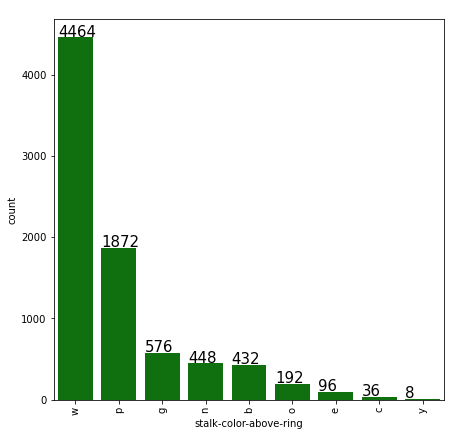

		stalk-color-below-ring Distribution

+----+------------+-------------------------------------+
|    | Category   |   stalk-color-below-ring_Percentage |
|----+------------+-------------------------------------|
|  0 | w          |                               53.96 |
|  1 | p          |                               23.04 |
|  2 | g          |                                7.09 |
|  3 | n          |                                6.3  |
|  4 | b          |                                5.32 |
|  5 | o          |                                2.36 |
|  6 | e          |                                1.18 |
|  7 | c          |                                0.44 |
|  8 | y          |                                0.3  |
+----+------------+-------------------------------------+


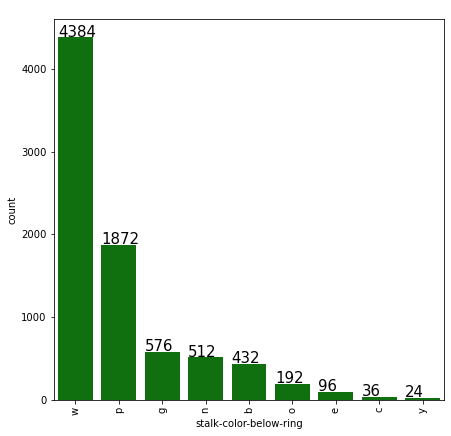

		veil-type Distribution

+----+------------+------------------------+
|    | Category   |   veil-type_Percentage |
|----+------------+------------------------|
|  0 | p          |                    100 |
+----+------------+------------------------+


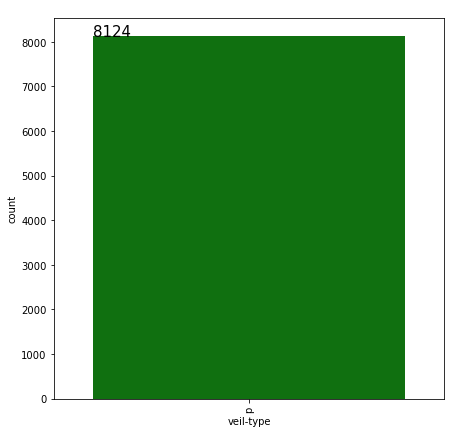

		veil-color Distribution

+----+------------+-------------------------+
|    | Category   |   veil-color_Percentage |
|----+------------+-------------------------|
|  0 | w          |                   97.54 |
|  1 | n          |                    1.18 |
|  2 | o          |                    1.18 |
|  3 | y          |                    0.1  |
+----+------------+-------------------------+


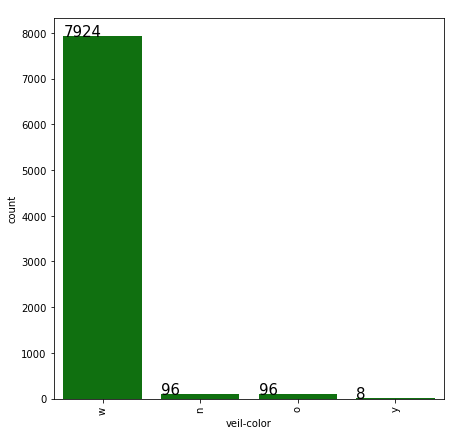

		ring-number Distribution

+----+------------+--------------------------+
|    | Category   |   ring-number_Percentage |
|----+------------+--------------------------|
|  0 | o          |                    92.17 |
|  1 | t          |                     7.39 |
|  2 | n          |                     0.44 |
+----+------------+--------------------------+


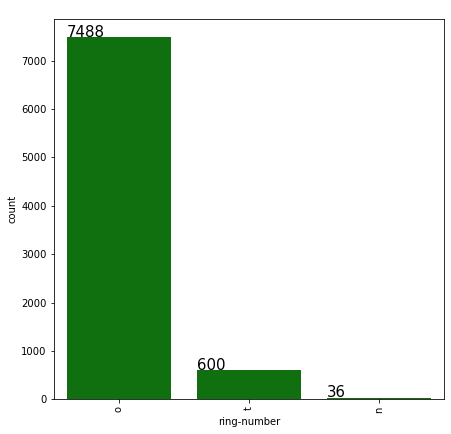

		ring-type Distribution

+----+------------+------------------------+
|    | Category   |   ring-type_Percentage |
|----+------------+------------------------|
|  0 | p          |                  48.84 |
|  1 | e          |                  34.17 |
|  2 | l          |                  15.95 |
|  3 | f          |                   0.59 |
|  4 | n          |                   0.44 |
+----+------------+------------------------+


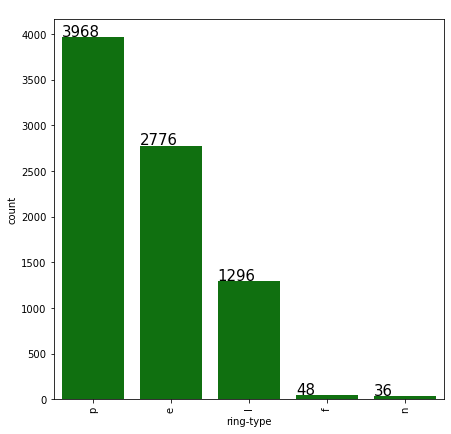

		spore-print-color Distribution

+----+------------+--------------------------------+
|    | Category   |   spore-print-color_Percentage |
|----+------------+--------------------------------|
|  0 | w          |                          29.39 |
|  1 | n          |                          24.22 |
|  2 | k          |                          23.04 |
|  3 | h          |                          20.09 |
|  4 | r          |                           0.89 |
|  5 | u          |                           0.59 |
|  6 | o          |                           0.59 |
|  7 | y          |                           0.59 |
|  8 | b          |                           0.59 |
+----+------------+--------------------------------+


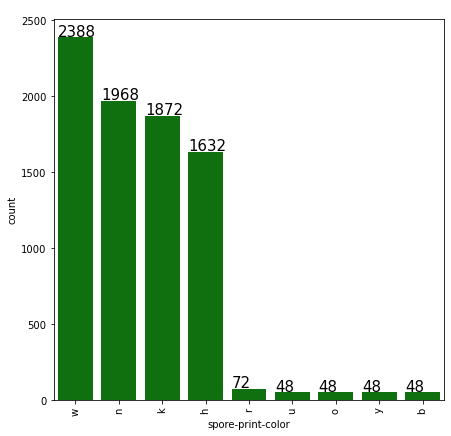

		population Distribution

+----+------------+-------------------------+
|    | Category   |   population_Percentage |
|----+------------+-------------------------|
|  0 | v          |                   49.73 |
|  1 | y          |                   21.07 |
|  2 | s          |                   15.36 |
|  3 | n          |                    4.92 |
|  4 | a          |                    4.73 |
|  5 | c          |                    4.19 |
+----+------------+-------------------------+


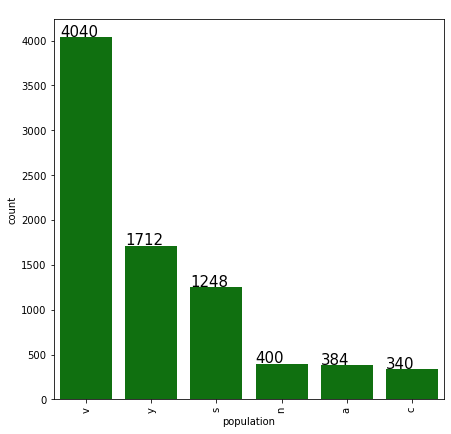

		habitat Distribution

+----+------------+----------------------+
|    | Category   |   habitat_Percentage |
|----+------------+----------------------|
|  0 | d          |                38.75 |
|  1 | g          |                26.44 |
|  2 | p          |                14.08 |
|  3 | l          |                10.24 |
|  4 | u          |                 4.53 |
|  5 | m          |                 3.59 |
|  6 | w          |                 2.36 |
+----+------------+----------------------+


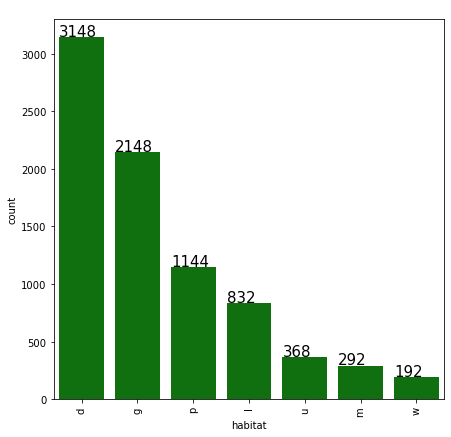

In [8]:
for i in df.columns.tolist():
    categroy_distribution(df, i)

In [9]:
''' 
lets try to check the percentage of missing values,unique values,percentage of one catagory values 
and type against each column.

'''
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
df_ = stats_df.sort_values('% MissingValues', ascending=False)
print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+-----------------+-------------------+------------------------------+--------+
|    | Feature                  |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type   |
|----+--------------------------+-----------------+-------------------+------------------------------+--------|
|  0 | class                    |               2 |                 0 |                      51.7971 | object |
| 12 | stalk-surface-above-ring |               4 |                 0 |                      63.7125 | object |
| 21 | population               |               6 |                 0 |                      49.7292 | object |
| 20 | spore-print-color        |               9 |                 0 |                      29.3944 | object |
| 19 | ring-type                |               5 |                 0 |                      48.8429 | object |
| 18 | ring-number              |               3 |                 0 |                      92.1713 | o

In [10]:
def drop_high_categrocal_features(df):
    # lets remove the features which has only one category value equal 100% because that are not good for model prediction
    stats = []
    for col in df.columns[:-1]:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
    df_ = stats_df.sort_values('% MissingValues', ascending=False)
    one_category_value = df_[df_['% highOneCategoricalValues']==100]
    print(tabulate(one_category_value, headers = 'keys', tablefmt = 'psql'))
    return one_category_value

In [11]:
one_category_value = drop_high_categrocal_features(df)

+----+-----------+-----------------+-------------------+------------------------------+--------+
|    | Feature   |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type   |
|----+-----------+-----------------+-------------------+------------------------------+--------|
| 16 | veil-type |               1 |                 0 |                          100 | object |
+----+-----------+-----------------+-------------------+------------------------------+--------+


In [12]:
drop_features = one_category_value['Feature'].tolist()
drop_features

['veil-type']

In [13]:
# lets drop the features
df = df.drop(drop_features, axis=1)

In [14]:
df.shape

(8124, 22)

In [15]:
X = df.drop('stalk-root', axis = 1)
y = df['stalk-root']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# One-hot Encoding

In [17]:
## Create a pipeline for one hot encoding categorical columns
cat_cols = X.columns.tolist()

cat_transformer = Pipeline(steps = [
  ('ohe', OneHotEncoder(handle_unknown='error', 
                        sparse=False,
                        drop='first'))])

## Define pipeline for preprocessing X
preprocessing = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols)
])
## Preprocess training and test predictors (X)
df_onehot = preprocessing.fit_transform(X)
# df_impute = preprocessing.fit_transform(df_impute)

In [18]:
## Get the feature names in the order they appear in preprocessed data
feature_names = preprocessing.named_transformers_['cat'].named_steps['ohe'].get_feature_names(cat_cols)
feature_names

array(['class_p', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_g', 'cap-surface_s',
       'cap-surface_y', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c', 'odor_f',
       'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'gill-attachment_f', 'gill-spacing_w', 'gill-size_n',
       'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r',
       'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shap_t',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'stalk-color-above-ring_c', 'stalk-color-above-ring_e',
       'stalk-color-above-ring_g', 'stalk-color-above-r

In [19]:
df_onehot_dataframe = pd.DataFrame(df_onehot, columns=feature_names.tolist())
df_onehot_dataframe.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shap_t,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_onehot_dataframe['stalk-root'] = df['stalk-root']

In [21]:
df_without_missing_data = df_onehot_dataframe[~(df_onehot_dataframe['stalk-root']=='?')] # getting clean data
df_with_missing_data =df_onehot_dataframe[df_onehot_dataframe['stalk-root']=='?'] # getting missing data

In [22]:
X = df_without_missing_data.iloc[:,:-1] # independent features
y = df_without_missing_data.iloc[:,-1] # dependent features

# Label Encoding

In [23]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 1, 1, ..., 0, 1, 1])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y, test_size=0.2)

## KNeighborsClassifier

In [25]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [26]:
def euclidean(point, data):
    '''Euclidean distance between a point  & data'''
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [27]:
class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

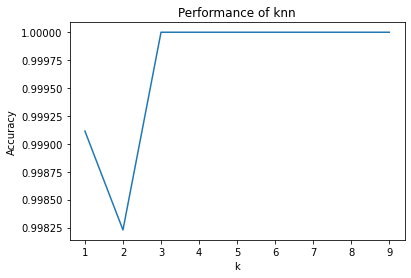

In [28]:
accuracies = []
ks = range(1, 10)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

* From above anaylsis, we can see that k at 1 and above 2, giving good accuracy each K. Therefore, lets set the K value 4.

In [29]:
knn = KNeighborsClassifier(k=4)
knn.fit(X_train, y_train)

In [30]:
print(classification_report(knn.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       776
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       206
           3       1.00      1.00      1.00        46

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [31]:
df_with_missing_data.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shap_t,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root
3984,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,?
4023,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,?
4076,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,?
4100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?
4104,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,?


In [32]:
df_imputing = df_with_missing_data.iloc[:,:-1].values
y_pred = knn.predict(df_imputing)

In [33]:
df_with_missing_data['stalk-root'] = y_pred
df_without_missing_data['stalk-root'] = y

In [34]:
df_with_missing_data.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shap_t,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root
3984,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4023,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4076,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4104,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [35]:
df_without_missing_data.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shap_t,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


In [36]:
le.classes_

array(['b', 'c', 'e', 'r'], dtype=object)

In [37]:
df_clean_data = pd.concat([df_without_missing_data, df_with_missing_data])
df_clean_data['stalk-root'] = df_clean_data['stalk-root'].map(
{
    0:'b',
    1:'c',
    2:'e',
    3:'r'
})
df_clean_data.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shap_t,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,e
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,c
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,c
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,e
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e


In [38]:
df_onehot_stalk_root = pd.get_dummies(df_clean_data['stalk-root'], columns=['stalk-root'], prefix="stalk-root")
df_onehot_stalk_root

,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
8119,1,0,0,0
8120,1,0,0,0
8121,1,0,0,0
8122,1,0,0,0


In [39]:
df_clean_data_final = df_clean_data.drop('stalk-root', axis = 1)
df_clean_data_final = pd.concat([df_clean_data_final, df_onehot_stalk_root], axis = 1)
df_clean_data_final.head(10)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shap_t,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

#### Concept Question #1 : Why don’t we one-hot encode the response data to train the KNN model instead?

* Yes, we can train the KNN model on one-hot encode target features. 
* In case you have one target (one column) with four classes, you have a multiclass setting.

* In case you have four targets (four columns) with binary class (1, 0), you have a multilabel setting.

* When we will do one-hot encoding then our problem related to multiclassification and then we will train the KNN using different techniques OneVSRestClassifier etc and time complexity will also be increases.

# Model building - Classification

In [40]:
X = df_clean_data_final.drop('class_p',axis = 1)
y = df_clean_data_final['class_p']

In [41]:
# lets split the dataset 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [43]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(model,predictions, y_test_set, model_name):    
    """
    In modelEvaluation function we are doing all the things that given below:
    - checking the accuracy of model
    - checking the precision of model
    - checking the recall of model 
    - checking the f1-score of model
    - checking confusion matrix
    - checking classification report
    """
    # Print model evaluation to predicted result    
    print("="*100)
    print("\t\t", model_name)
    print("="*100)
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("Precision on validation set: {:.4f}".format(precision_score(y_test_set, predictions)))    
    print ("Recall on validation set: {:.4f}".format(recall_score(y_test_set, predictions)))
    print ("F1_Score on validation set: {:.4f}".format(f1_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    
    print("="*30)
    print ("\tConfusion Matrix",)
    print("="*30)
    cm = confusion_matrix(y_test_set, predictions)
    print(cm)
    
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum()) for item in cm.flatten()]

        ]
    ).reshape(2, 2)

    plt.figure(figsize=(8, 6))

    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions),
              recall_score(y_test_set, predictions),f1_score(y_test_set, predictions)]
    return results

In [44]:
def model_building(model_object, X_train, X_test, y_train, y_test):
    # lets fit the model object
    import time
    start = time.time()
    %time model_object.fit(X_train, y_train)
    end = time.time()-start
    print("Model Traning time (s):", end)
    
    # predicting the model
    predictions = model_object.predict(X_test)
    # checking the results of model
    results = modelEvaluation(model_object,predictions, y_test, model_object)
    return results, end

### Logistic Regression

Wall time: 259 ms
Model Traning time (s): 0.25985217094421387
		 LogisticRegression(random_state=42)

Accuracy on validation set: 1.0000
Precision on validation set: 1.0000
Recall on validation set: 1.0000
F1_Score on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       847
         1.0       1.00      1.00      1.00       778

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

	Confusion Matrix
[[847   0]
 [  0 778]]


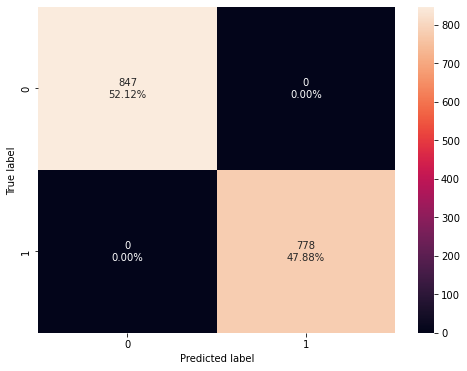

In [45]:
lr = LogisticRegression(random_state=42)
results_lr,lr_time = model_building(lr,  X_train, X_test, y_train, y_test)

### Random Forest

Wall time: 731 ms
Model Traning time (s): 0.7305822372436523
		 RandomForestClassifier(random_state=42)

Accuracy on validation set: 1.0000
Precision on validation set: 1.0000
Recall on validation set: 1.0000
F1_Score on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       847
         1.0       1.00      1.00      1.00       778

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

	Confusion Matrix
[[847   0]
 [  0 778]]


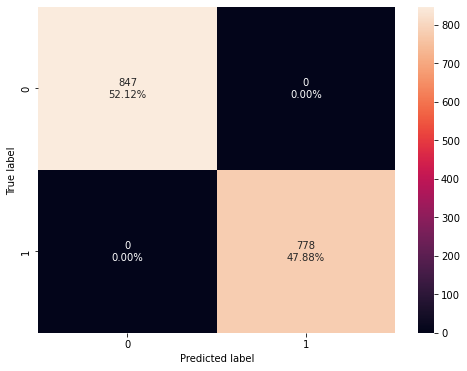

In [46]:
rf = RandomForestClassifier(random_state=42)
results_rf, rf_time = model_building(rf,  X_train, X_test, y_train, y_test)

In [47]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score', 'time elapsed'],
    'Logistic Regression':results_lr+[lr_time],
    'Random Forest':results_rf+[rf_time],
    
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))

+---------------------+------------+-------------+----------+------------+----------------+
|                     |   accuracy |   precision |   recall |   f1-score |   time elapsed |
|---------------------+------------+-------------+----------+------------+----------------|
| Logistic Regression |          1 |           1 |        1 |          1 |       0.259852 |
| Random Forest       |          1 |           1 |        1 |          1 |       0.730582 |
+---------------------+------------+-------------+----------+------------+----------------+


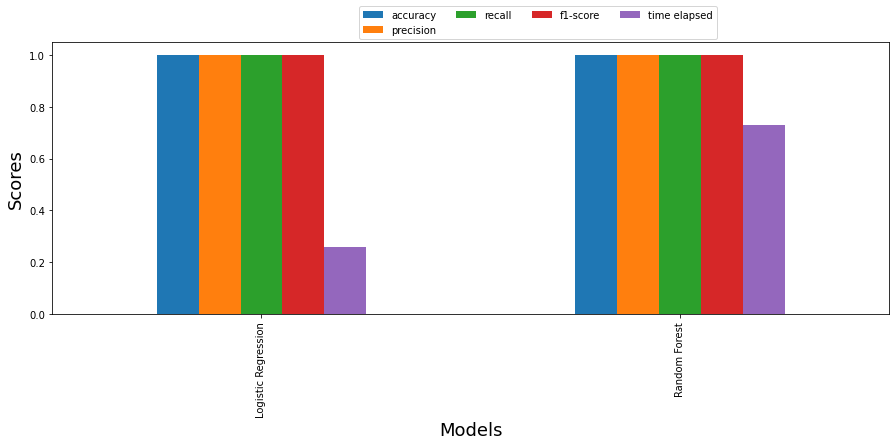

In [48]:
metrics_df.T.plot(kind='bar', figsize=(15,5))
plt.ylabel('Scores',fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.legend(ncol=4, bbox_to_anchor=(0.8,1.15))
plt.show()

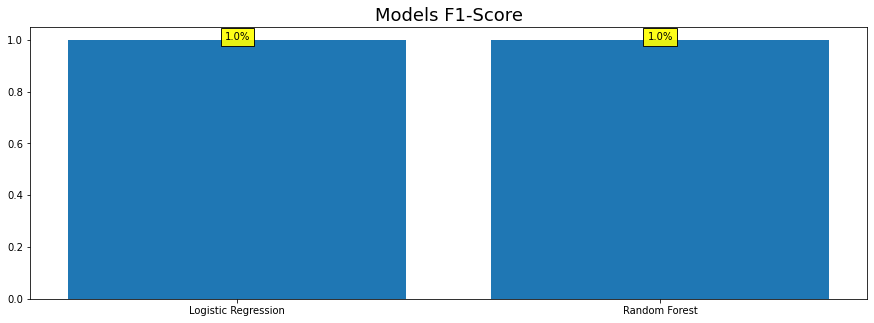

In [49]:
models_acc = metrics_df.iloc[3].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models F1-Score", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],4),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

# PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA()
X_pca_reduced = pca.fit_transform(X)

In [52]:
def plot_cumm_var(pca, threshold=None):
    pc_list = ["PC"+str(i) for i in list(range(1, len(pca.explained_variance_ratio_.tolist())+1))]
    pca_variance = np.cumsum(pca.explained_variance_ratio_.tolist())
    pca_df = pd.DataFrame({'pca_feature':pc_list,'cummulative variance':pca_variance})
    pca_df['cummulative variance'] = round(pca_df['cummulative variance']*100,2)
    print(tabulate(pca_df, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(15,5))
    plt.plot(pc_list,pca_variance,c='red',marker='X', linewidth=2,markersize=9)
    if threshold:
        # Draw line set threshold
        value99 = pca_variance[-1]*threshold
        plt.hlines(y = value99, xmin=0, xmax=len(pca.explained_variance_ratio_.tolist()), color = 'r', linestyles = 'dashed')
    plt.title("PCA Variance Graph", fontsize=18)
    plt.xlabel("PCs",fontsize=18)
    plt.ylabel("Cummulative Variance",fontsize=18)  
    plt.xticks(rotation=90)
    plt.show()

* Draw a horizontal line on the above plot to highlight the threshold of 95%.

+----+---------------+------------------------+
|    | pca_feature   |   cummulative variance |
|----+---------------+------------------------|
|  0 | PC1           |                  18.15 |
|  1 | PC2           |                  28.75 |
|  2 | PC3           |                  37.89 |
|  3 | PC4           |                  43.14 |
|  4 | PC5           |                  47.54 |
|  5 | PC6           |                  51.54 |
|  6 | PC7           |                  55.23 |
|  7 | PC8           |                  58.4  |
|  8 | PC9           |                  61.02 |
|  9 | PC10          |                  63.52 |
| 10 | PC11          |                  65.76 |
| 11 | PC12          |                  67.99 |
| 12 | PC13          |                  69.93 |
| 13 | PC14          |                  71.77 |
| 14 | PC15          |                  73.55 |
| 15 | PC16          |                  75.27 |
| 16 | PC17          |                  76.8  |
| 17 | PC18          |                  

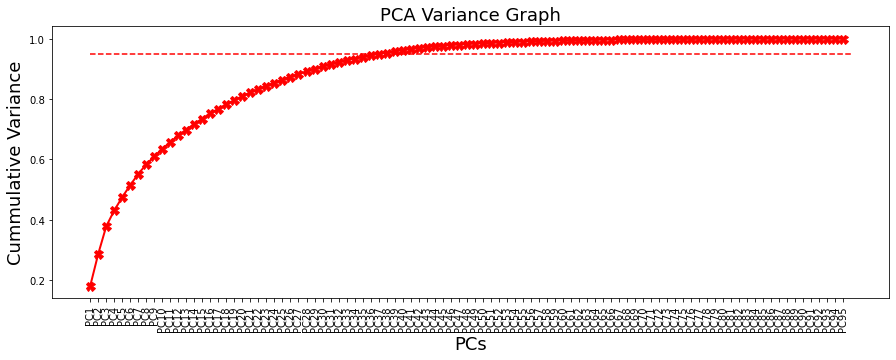

In [53]:
plot_cumm_var(pca, threshold=0.95)

* In this case, to get 95% of variance explained I need 39 principal components.

In [54]:
pca1 = PCA(n_components = 39)
X_pca1_reduced = pca1.fit_transform(X)

In [55]:
X_pca1_reduced.shape

(8124, 39)

In [56]:
# lets split the dataset 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_pca1_reduced, y, test_size=0.2, random_state=0)

Wall time: 115 ms
Model Traning time (s): 0.11593484878540039
		 LogisticRegression(random_state=42)

Accuracy on validation set: 0.9920
Precision on validation set: 0.9923
Recall on validation set: 0.9910
F1_Score on validation set: 0.9916

Classification report : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       847
         1.0       0.99      0.99      0.99       778

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

	Confusion Matrix
[[841   6]
 [  7 771]]


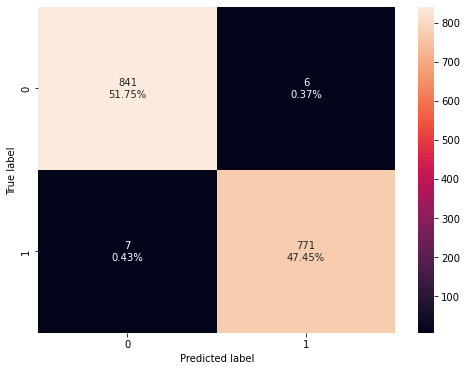

In [57]:
lr = LogisticRegression(random_state=42)
results_lr_pca,lr_time_pca = model_building(lr,  X_train, X_test, y_train, y_test)

Wall time: 4.53 s
Model Traning time (s): 4.532404899597168
		 RandomForestClassifier(random_state=42)

Accuracy on validation set: 1.0000
Precision on validation set: 1.0000
Recall on validation set: 1.0000
F1_Score on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       847
         1.0       1.00      1.00      1.00       778

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

	Confusion Matrix
[[847   0]
 [  0 778]]


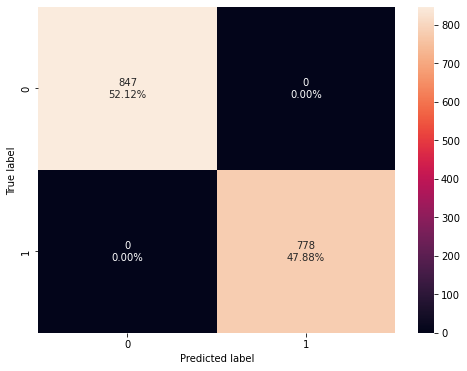

In [58]:
rf = RandomForestClassifier(random_state=42)
results_rf_pca, rf_time_pca = model_building(rf,  X_train, X_test, y_train, y_test)

In [59]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score', 'time elapsed'],
    'Logistic Regression':results_lr+[lr_time],
    'Random Forest':results_rf+[rf_time],
    'Logistic Regression (PCA)':results_lr_pca+[lr_time_pca],
    'Random Forest (PCA)':results_rf_pca+[rf_time_pca],
    
    
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))

+---------------------------+------------+-------------+----------+------------+----------------+
|                           |   accuracy |   precision |   recall |   f1-score |   time elapsed |
|---------------------------+------------+-------------+----------+------------+----------------|
| Logistic Regression       |      1     |    1        | 1        |    1       |       0.259852 |
| Random Forest             |      1     |    1        | 1        |    1       |       0.730582 |
| Logistic Regression (PCA) |      0.992 |    0.992278 | 0.991003 |    0.99164 |       0.115935 |
| Random Forest (PCA)       |      1     |    1        | 1        |    1       |       4.5324   |
+---------------------------+------------+-------------+----------+------------+----------------+


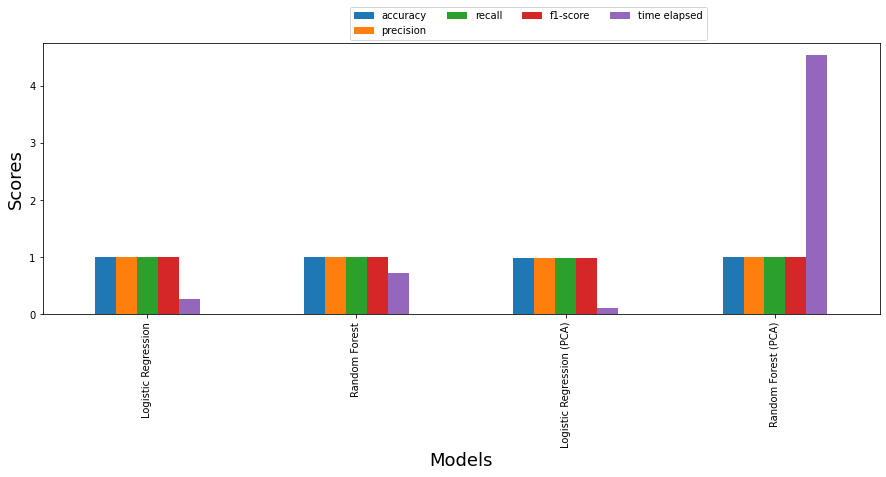

In [60]:
metrics_df.T.plot(kind='bar', figsize=(15,5))
plt.ylabel('Scores',fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.legend(ncol=4, bbox_to_anchor=(0.8,1.15))
plt.show()

* When we apply the PCA, we need 39 components to get the 95% variance.
* Our new dataset input features will be `39`.
* From above analysis, we can see that logistic regresson on PCA faster train as compare to others but you can see in table we will compromise on scores.
* Random forest on PCA taking too much time as compare to others even we have reduced the features from `95 to 39`. So, while fitting, the algorithm is iterating over possible splits that optimize the criterion. However, by reducing the number of features you might have made the problem to find this splits more difficult (by having less good splits to find), which makes the algorithm need more iterations to find a good split.

##### Concept Question #2: Why don’t we train these two models by one-hot encoding the response data instead, being careful to specify that the drop parameter of the OneHotEncoder class is set to ‘first’?


* We have a binary problem in which two values (p and e).
* No (OHE) it's not necessary. In fact it's not a good idea because this would create two target variables instead of one, a setting which corresponds to multi-label classification.

* The standard way is to simply represent the label as an integer 0 or 1, for example with LabelEncoder.